In [ ]:
# @title Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

train = pd.read_csv('/content/drive/MyDrive/Colab minipro 4 /Permodelan data Home Credit Indonesia/Data HCI/application_train.csv')
print(train.shape)
train.sample(5)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
162693,288612,0,Cash loans,M,Y,Y,0,180000.0,1113840.0,57001.5,900000.0,Other_B,Working,Secondary / secondary special,Married,House / apartment,0.011657,-21682,-2886,-4649.0,-4686,12.0,1,1,0,1,0,0,NaN,2.0,1,1,TUESDAY,11,0,1,1,0,0,0,Industry: type 9,NaN,0.548445,0.524496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2340.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
86927,200892,0,Cash loans,F,N,Y,0,112500.0,1711764.0,45283.5,1530000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008625,-22503,365243,-12118.0,-4723,NaN,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,XNA,0.861701,0.632785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1018.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
261227,402349,0,Cash loans,M,N,Y,0,225000.0,1125000.0,33025.5,1125000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.026392,-22254,-2226,-11915.0,-4768,NaN,1,1,0,1,0,0,Managers,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.808399,0.738011,0.574447,0.1856,NaN,0.9826,NaN,NaN,0.20,0.1724,0.3333,NaN,NaN,NaN,0.1142,NaN,0.2967,0.1891,NaN,0.9826,NaN,NaN,0.2014,0.1724,0.3333,NaN,NaN,NaN,0.1190,NaN,0.3141,0.1874,NaN,0.9826,NaN,NaN,0.20,0.1724,0.3333,NaN,NaN,NaN,0.1162,NaN,0.3029,NaN,block of flats,0.1543,Panel,No,2.0,0.0,2.0,0.0,-925.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,1.0
85293,198960,0,Cash loans,M,Y,N,0,45000.0,142632.0,14238.0,126000.0,Unaccompani

In [ ]:
# @title Mapping feature TARGET dan Handle Missing value pada Feature EXT_SOURCE 1-3
train['MAP_TARGET'] = train['TARGET'].replace({0 :'CURRENT', 1 :'NON CURRENT'})

train['EXT_SOURCE_1'] = train['EXT_SOURCE_1'].fillna(0)
train['EXT_SOURCE_2'] = train['EXT_SOURCE_2'].fillna(0)
train['EXT_SOURCE_3'] = train['EXT_SOURCE_3'].fillna(0)
train['TOTAL_EXT_SOURCE'] = train['EXT_SOURCE_1'] + train['EXT_SOURCE_2'] + train['EXT_SOURCE_3']

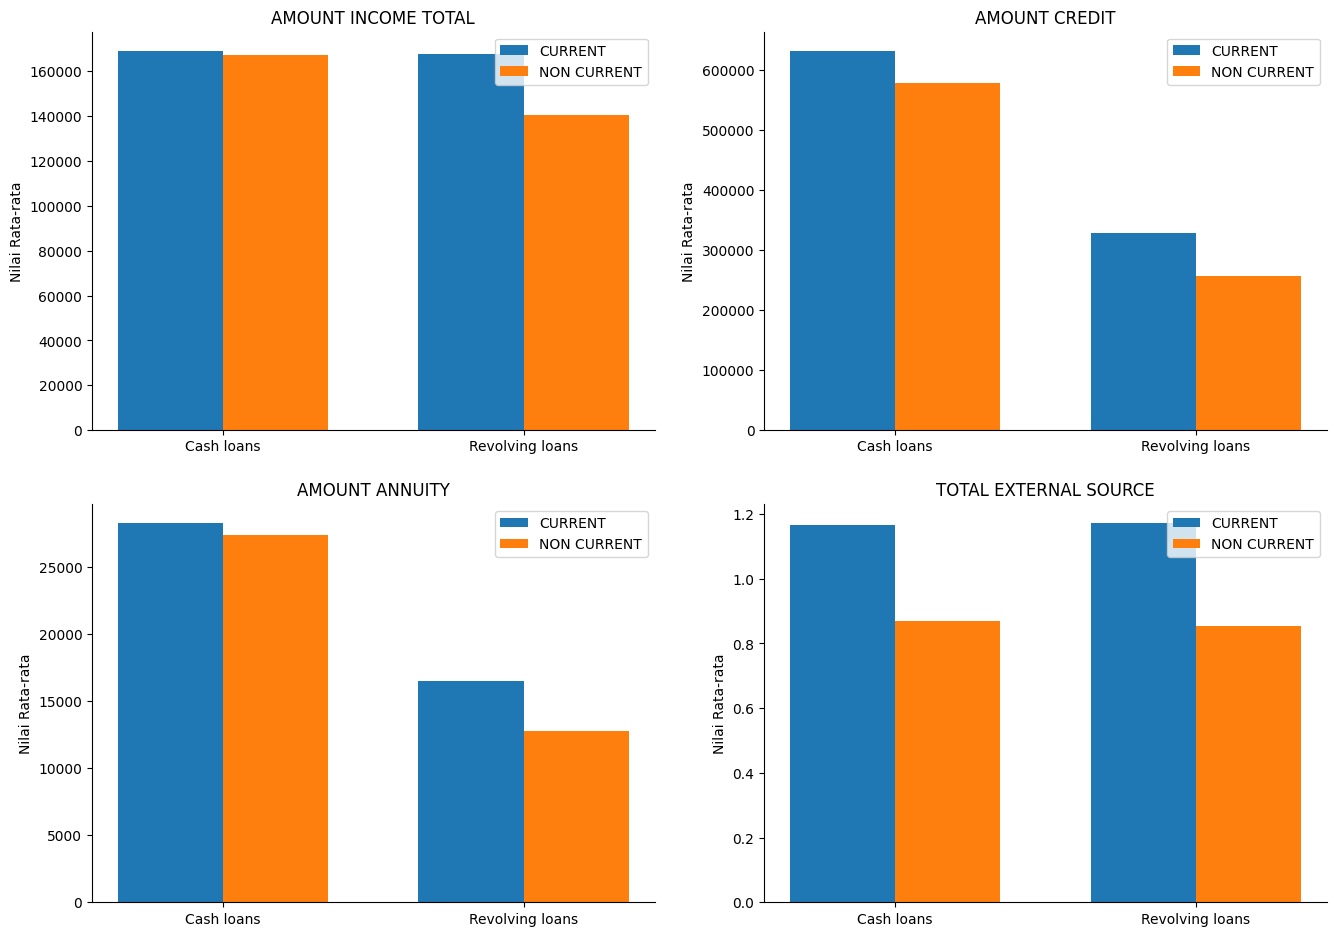

In [ ]:
# @title Membuat Plot dari hasil Grouping beberapa Feature
statistik_keuangan = train.groupby(['MAP_TARGET','NAME_CONTRACT_TYPE']).agg({'AMT_INCOME_TOTAL': 'mean',
                                                                             'AMT_CREDIT': 'mean',
                                                                             'AMT_ANNUITY': 'mean',
                                                                             'TOTAL_EXT_SOURCE': 'mean'}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14,10))
index =np.arange(len(statistik_keuangan['NAME_CONTRACT_TYPE'].unique()))
bar_width =0.35
for i, target in enumerate(statistik_keuangan['MAP_TARGET'].unique()):
  subset = statistik_keuangan[statistik_keuangan['MAP_TARGET']==target]
  axes[0, 0].bar(index + i * bar_width, subset['AMT_INCOME_TOTAL'], bar_width,label=target)

axes[0, 0].set_title('AMOUNT INCOME TOTAL')
axes[0, 0].set_xticks(index + bar_width / 2)
axes[0, 0].set_xticklabels(statistik_keuangan['NAME_CONTRACT_TYPE'].unique())
axes[0, 0].legend()
axes[0, 0].set_ylabel('Nilai Rata-rata')

# Plotting AMT_CREDIT
for i, target in enumerate(statistik_keuangan['MAP_TARGET'].unique()):
    subset = statistik_keuangan[statistik_keuangan['MAP_TARGET'] == target]
    axes[0, 1].bar(index + i * bar_width, subset['AMT_CREDIT'], bar_width, label=target)

axes[0, 1].set_title('AMOUNT CREDIT')
axes[0, 1].set_xticks(index + bar_width / 2)
axes[0, 1].set_xticklabels(statistik_keuangan['NAME_CONTRACT_TYPE'].unique())
axes[0, 1].legend()
axes[0, 1].set_ylabel('Nilai Rata-rata')

# Plotting AMT_ANNUITY
for i, target in enumerate(statistik_keuangan['MAP_TARGET'].unique()):
    subset = statistik_keuangan[statistik_keuangan['MAP_TARGET'] == target]
    axes[1, 0].bar(index + i * bar_width, subset['AMT_ANNUITY'], bar_width, label=target)

axes[1, 0].set_title('AMOUNT ANNUITY')
axes[1, 0].set_xticks(index + bar_width / 2)
axes[1, 0].set_xticklabels(statistik_keuangan['NAME_CONTRACT_TYPE'].unique())
axes[1, 0].legend()
axes[1, 0].set_ylabel('Nilai Rata-rata')

# Plotting TOTAL_EXT_SOURCE
for i, target in enumerate(statistik_keuangan['MAP_TARGET'].unique()):
    subset = statistik_keuangan[statistik_keuangan['MAP_TARGET'] == target]
    axes[1, 1].bar(index + i * bar_width, subset['TOTAL_EXT_SOURCE'], bar_width, label=target)

axes[1, 1].set_title('TOTAL EXTERNAL SOURCE')
axes[1, 1].set_xticks(index + bar_width / 2)
axes[1, 1].set_xticklabels(statistik_keuangan['NAME_CONTRACT_TYPE'].unique())
axes[1, 1].legend()
axes[1, 1].set_ylabel('Nilai Rata-rata')

# Menyesuaikan layout
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
plt.show()

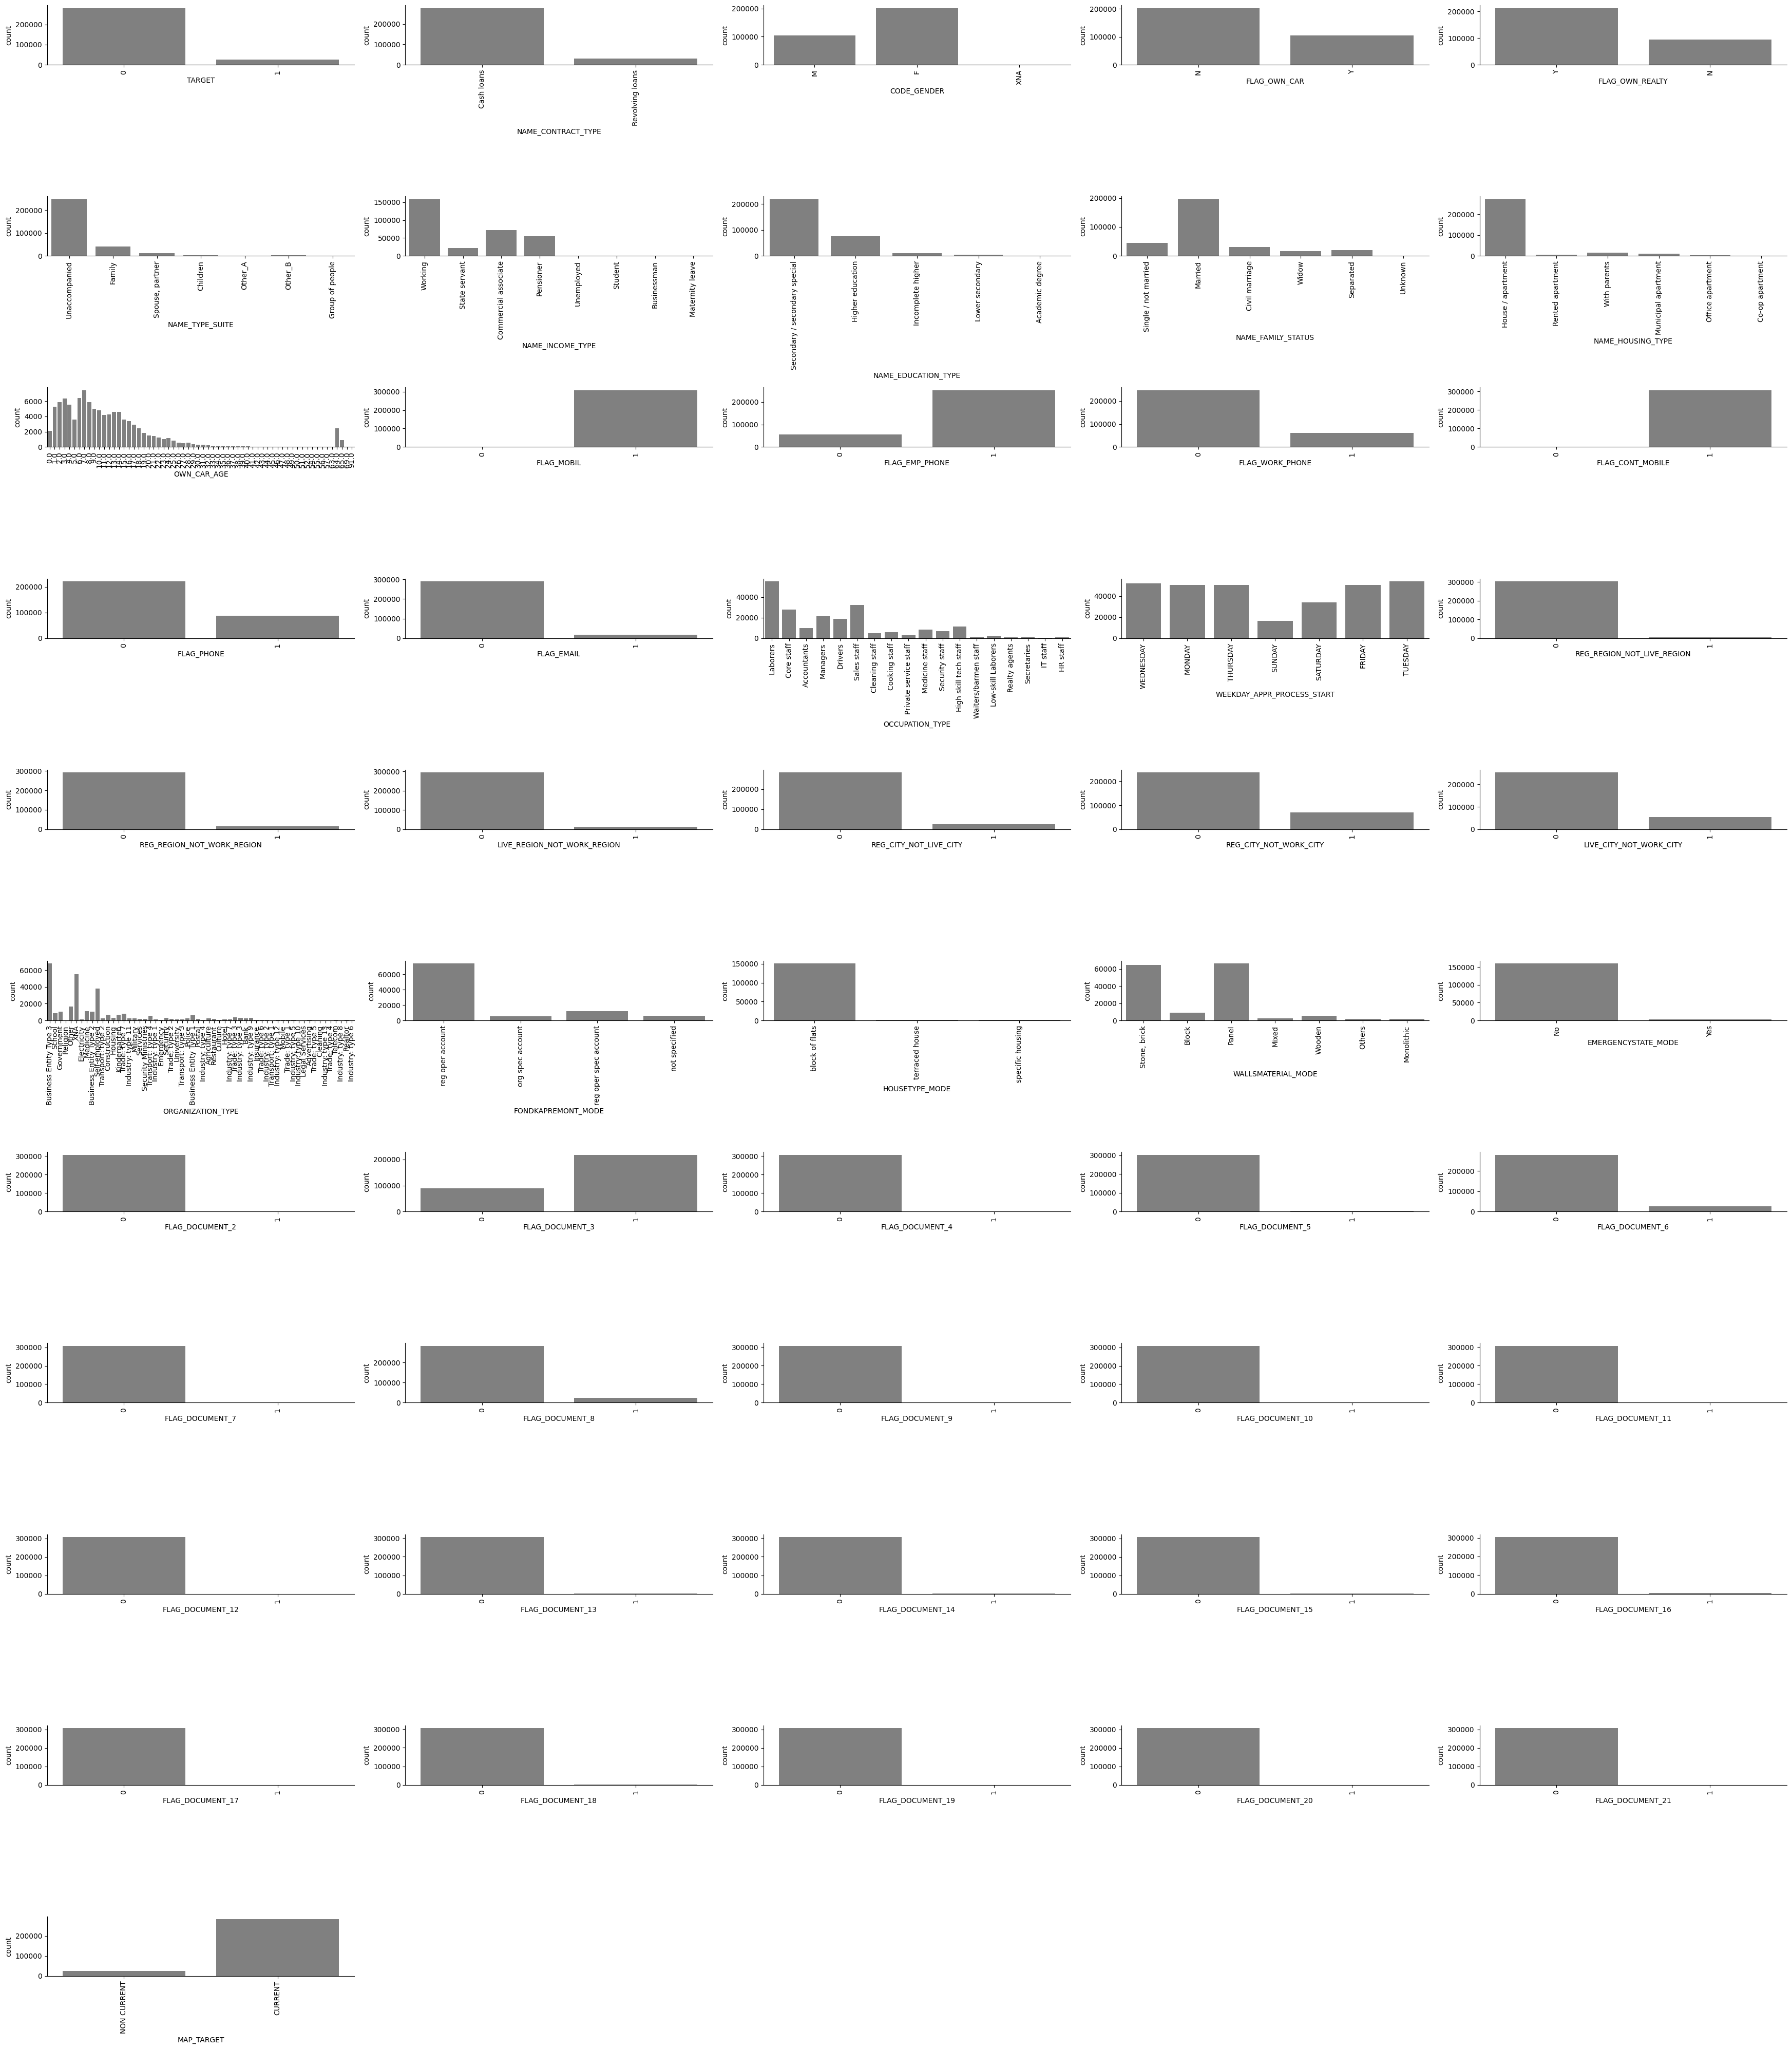

In [ ]:
# @title Visualisasi Distribusi Data kategorikal
feature_kategorikal = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE',
                       'WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
                       'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                       'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                       'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','MAP_TARGET']

plt.figure(figsize=(35,40))
for i in range(0, len(feature_kategorikal)):
  plt.subplot(11, 5, i+1)
  sns.countplot(x=train[feature_kategorikal[i]], color='grey')
  plt.xticks(rotation=90)
  plt.gca().spines[['top','right']].set_visible(False)
  plt.tight_layout()

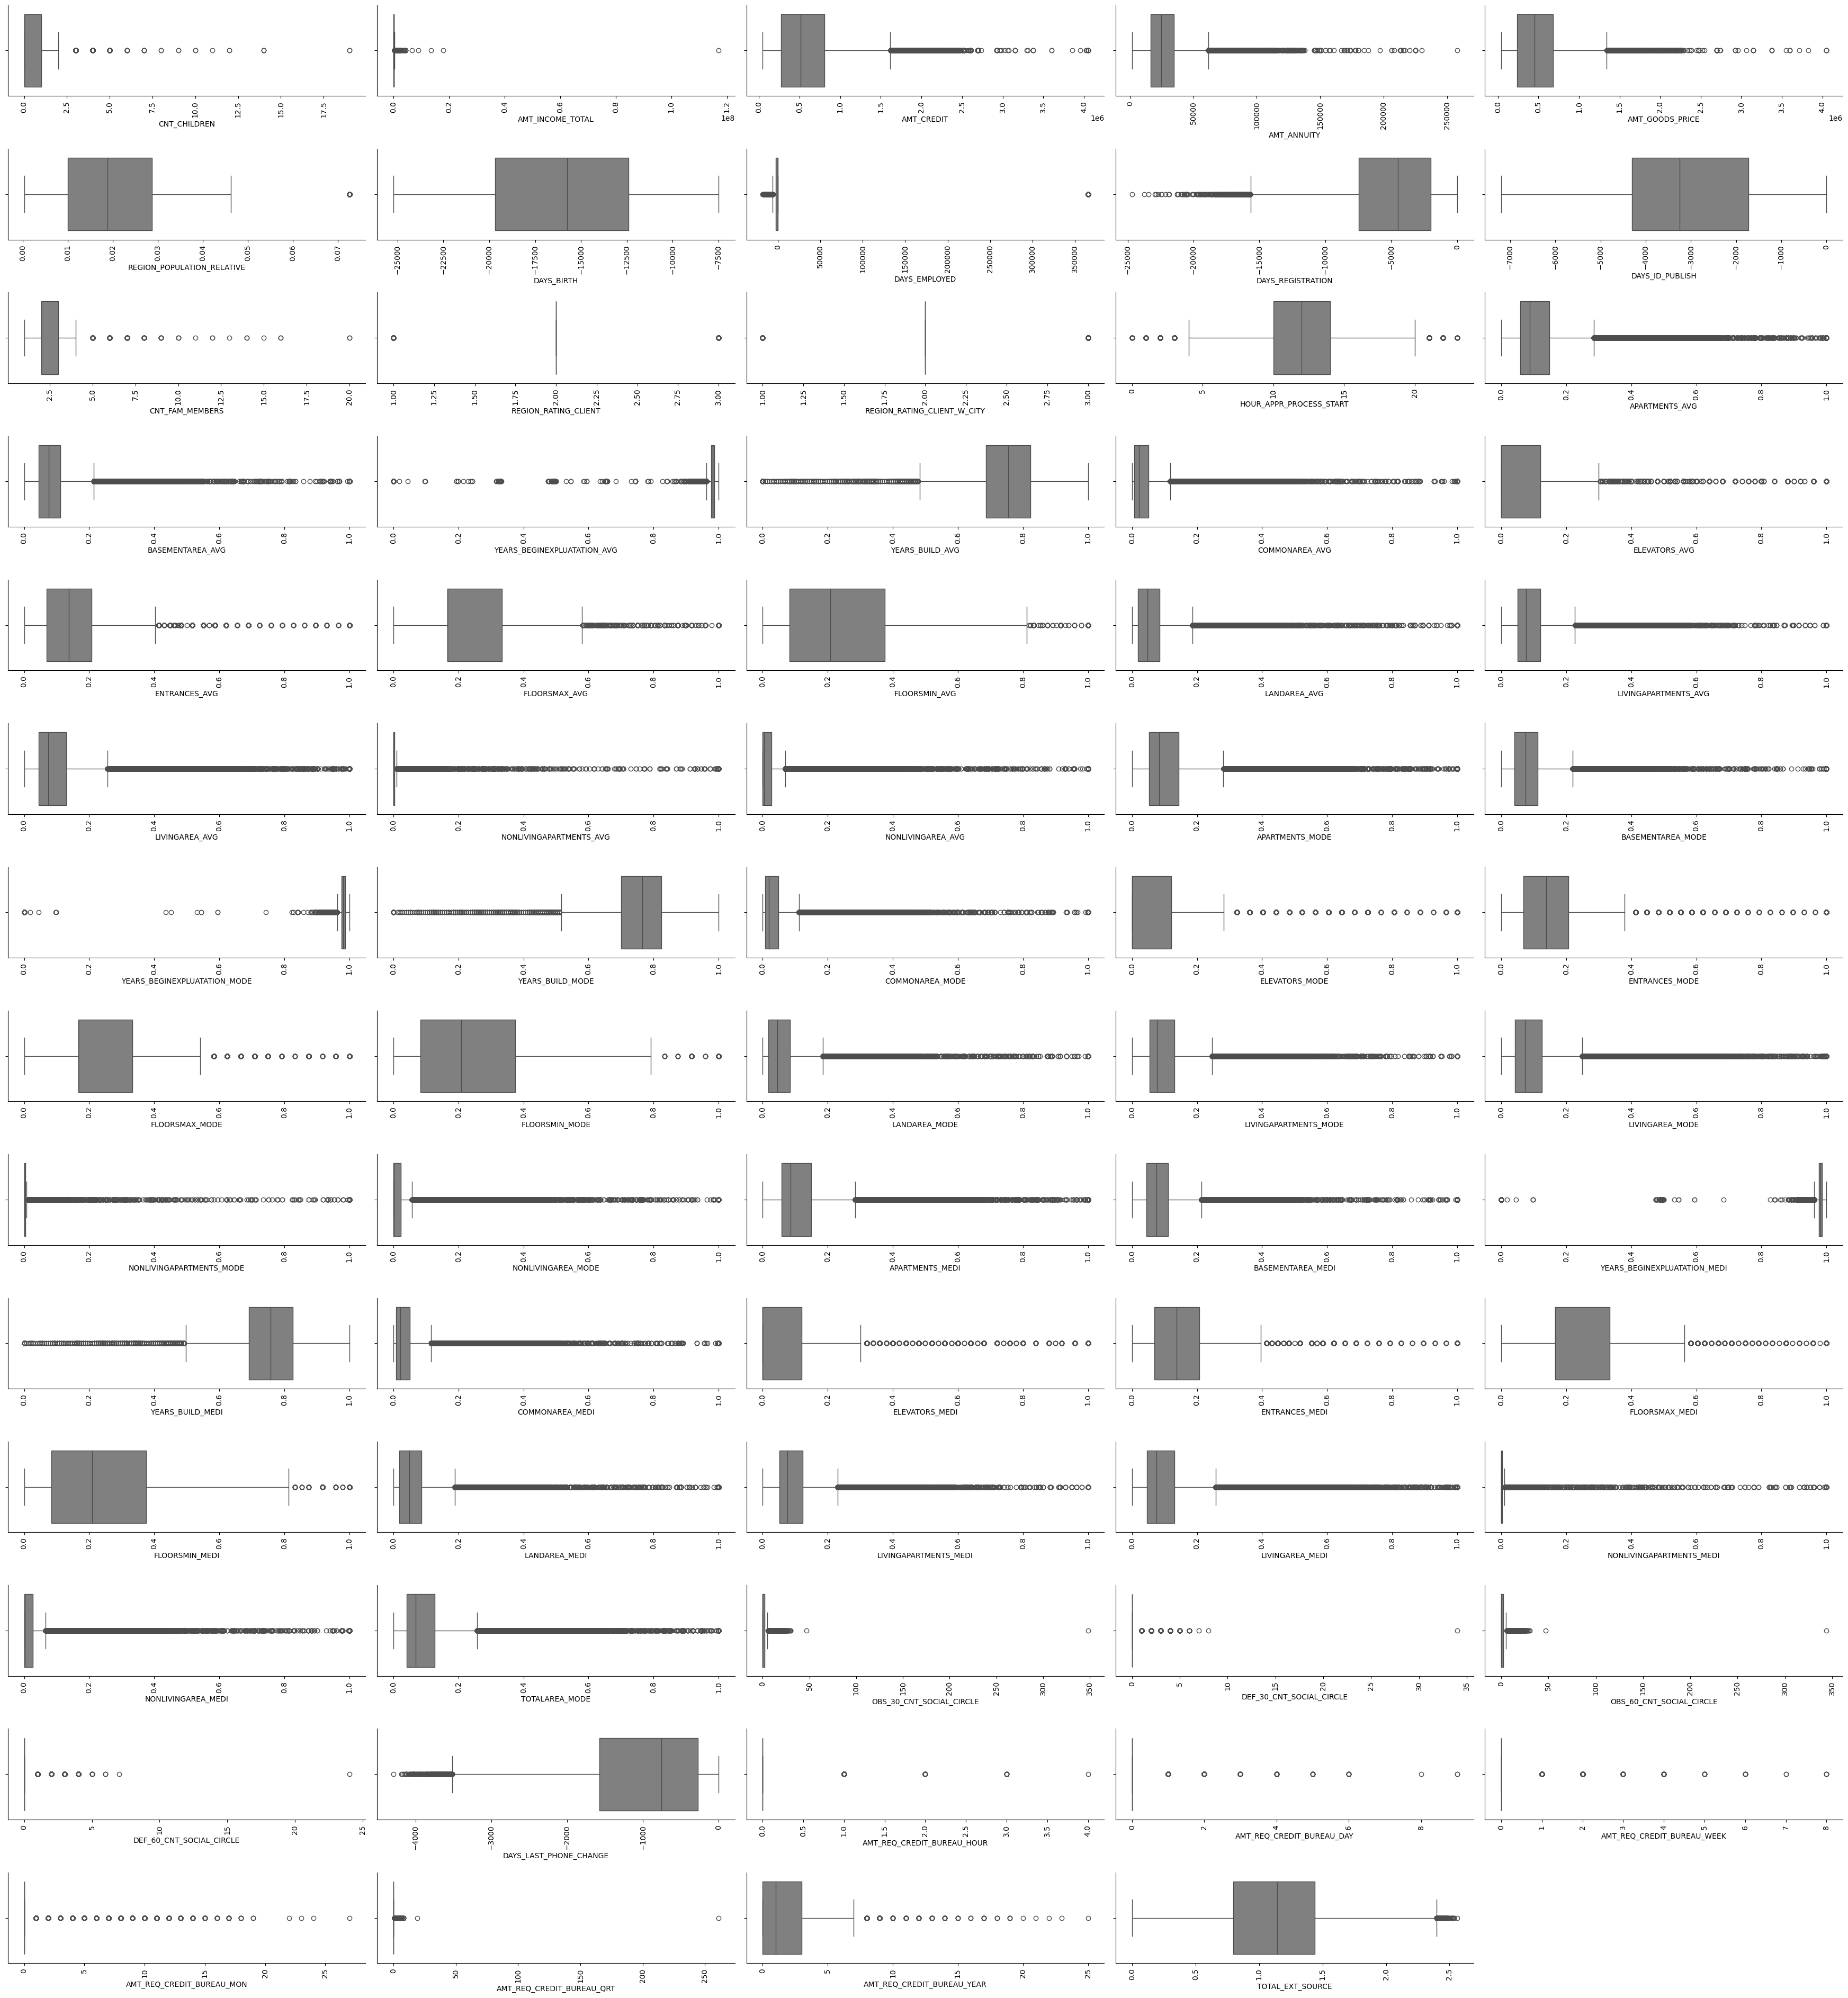

In [ ]:
# @title Analisa Outlier pada Data Numerik
numerikal = [ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
              'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START','APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
              'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG','FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
              'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
              'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
              'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI','LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
              'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
              'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'TOTAL_EXT_SOURCE']
plt.figure(figsize=(35,40))
for i in range(0, len(numerikal)):
  plt.subplot(15, 5, i+1)
  sns.boxplot(x=train[numerikal[i]], color='grey')
  plt.xticks(rotation=90)
  plt.gca().spines[['top','right']].set_visible(False)
  plt.tight_layout()


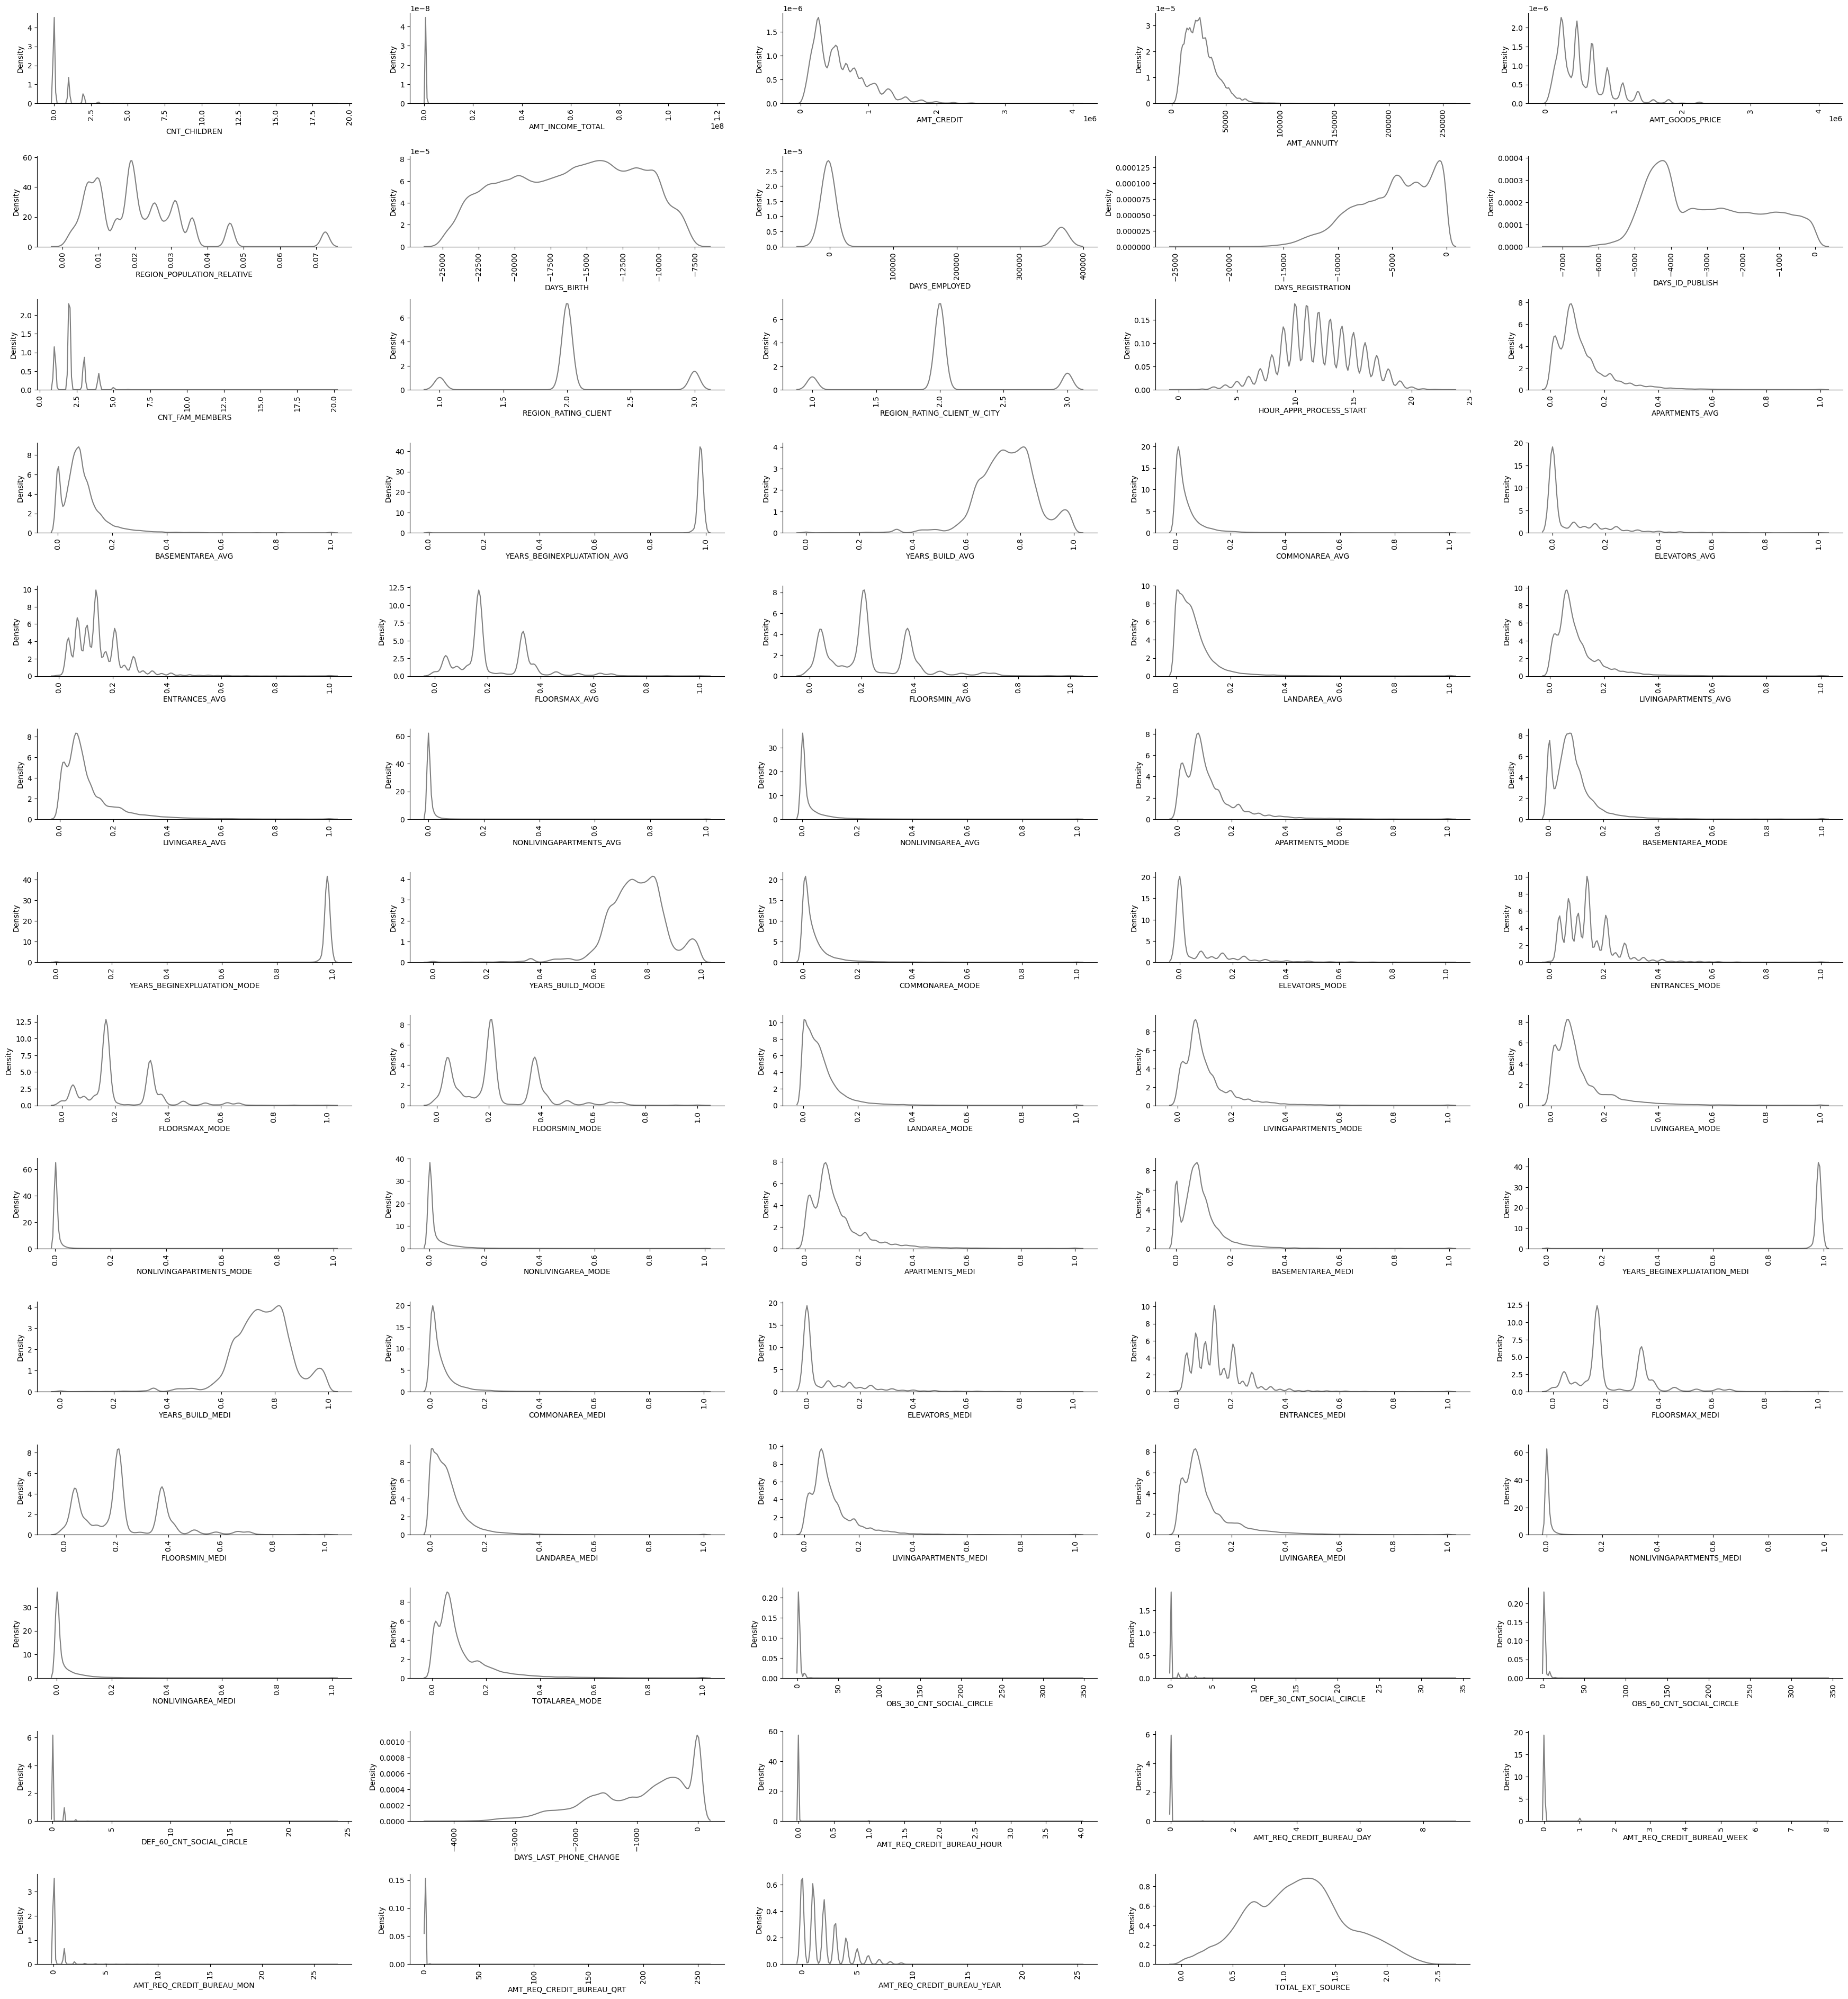

In [ ]:
# @title Visualisasi Distibusi Probabilitas Data Numerik
plt.figure(figsize=(35,40))
for i in range(0, len(numerikal)):
  plt.subplot(15, 5, i+1)
  sns.kdeplot(x=train[numerikal[i]], color='grey')
  plt.xticks(rotation=90)
  plt.gca().spines[['top','right']].set_visible(False)
  plt.tight_layout()

<Axes: >

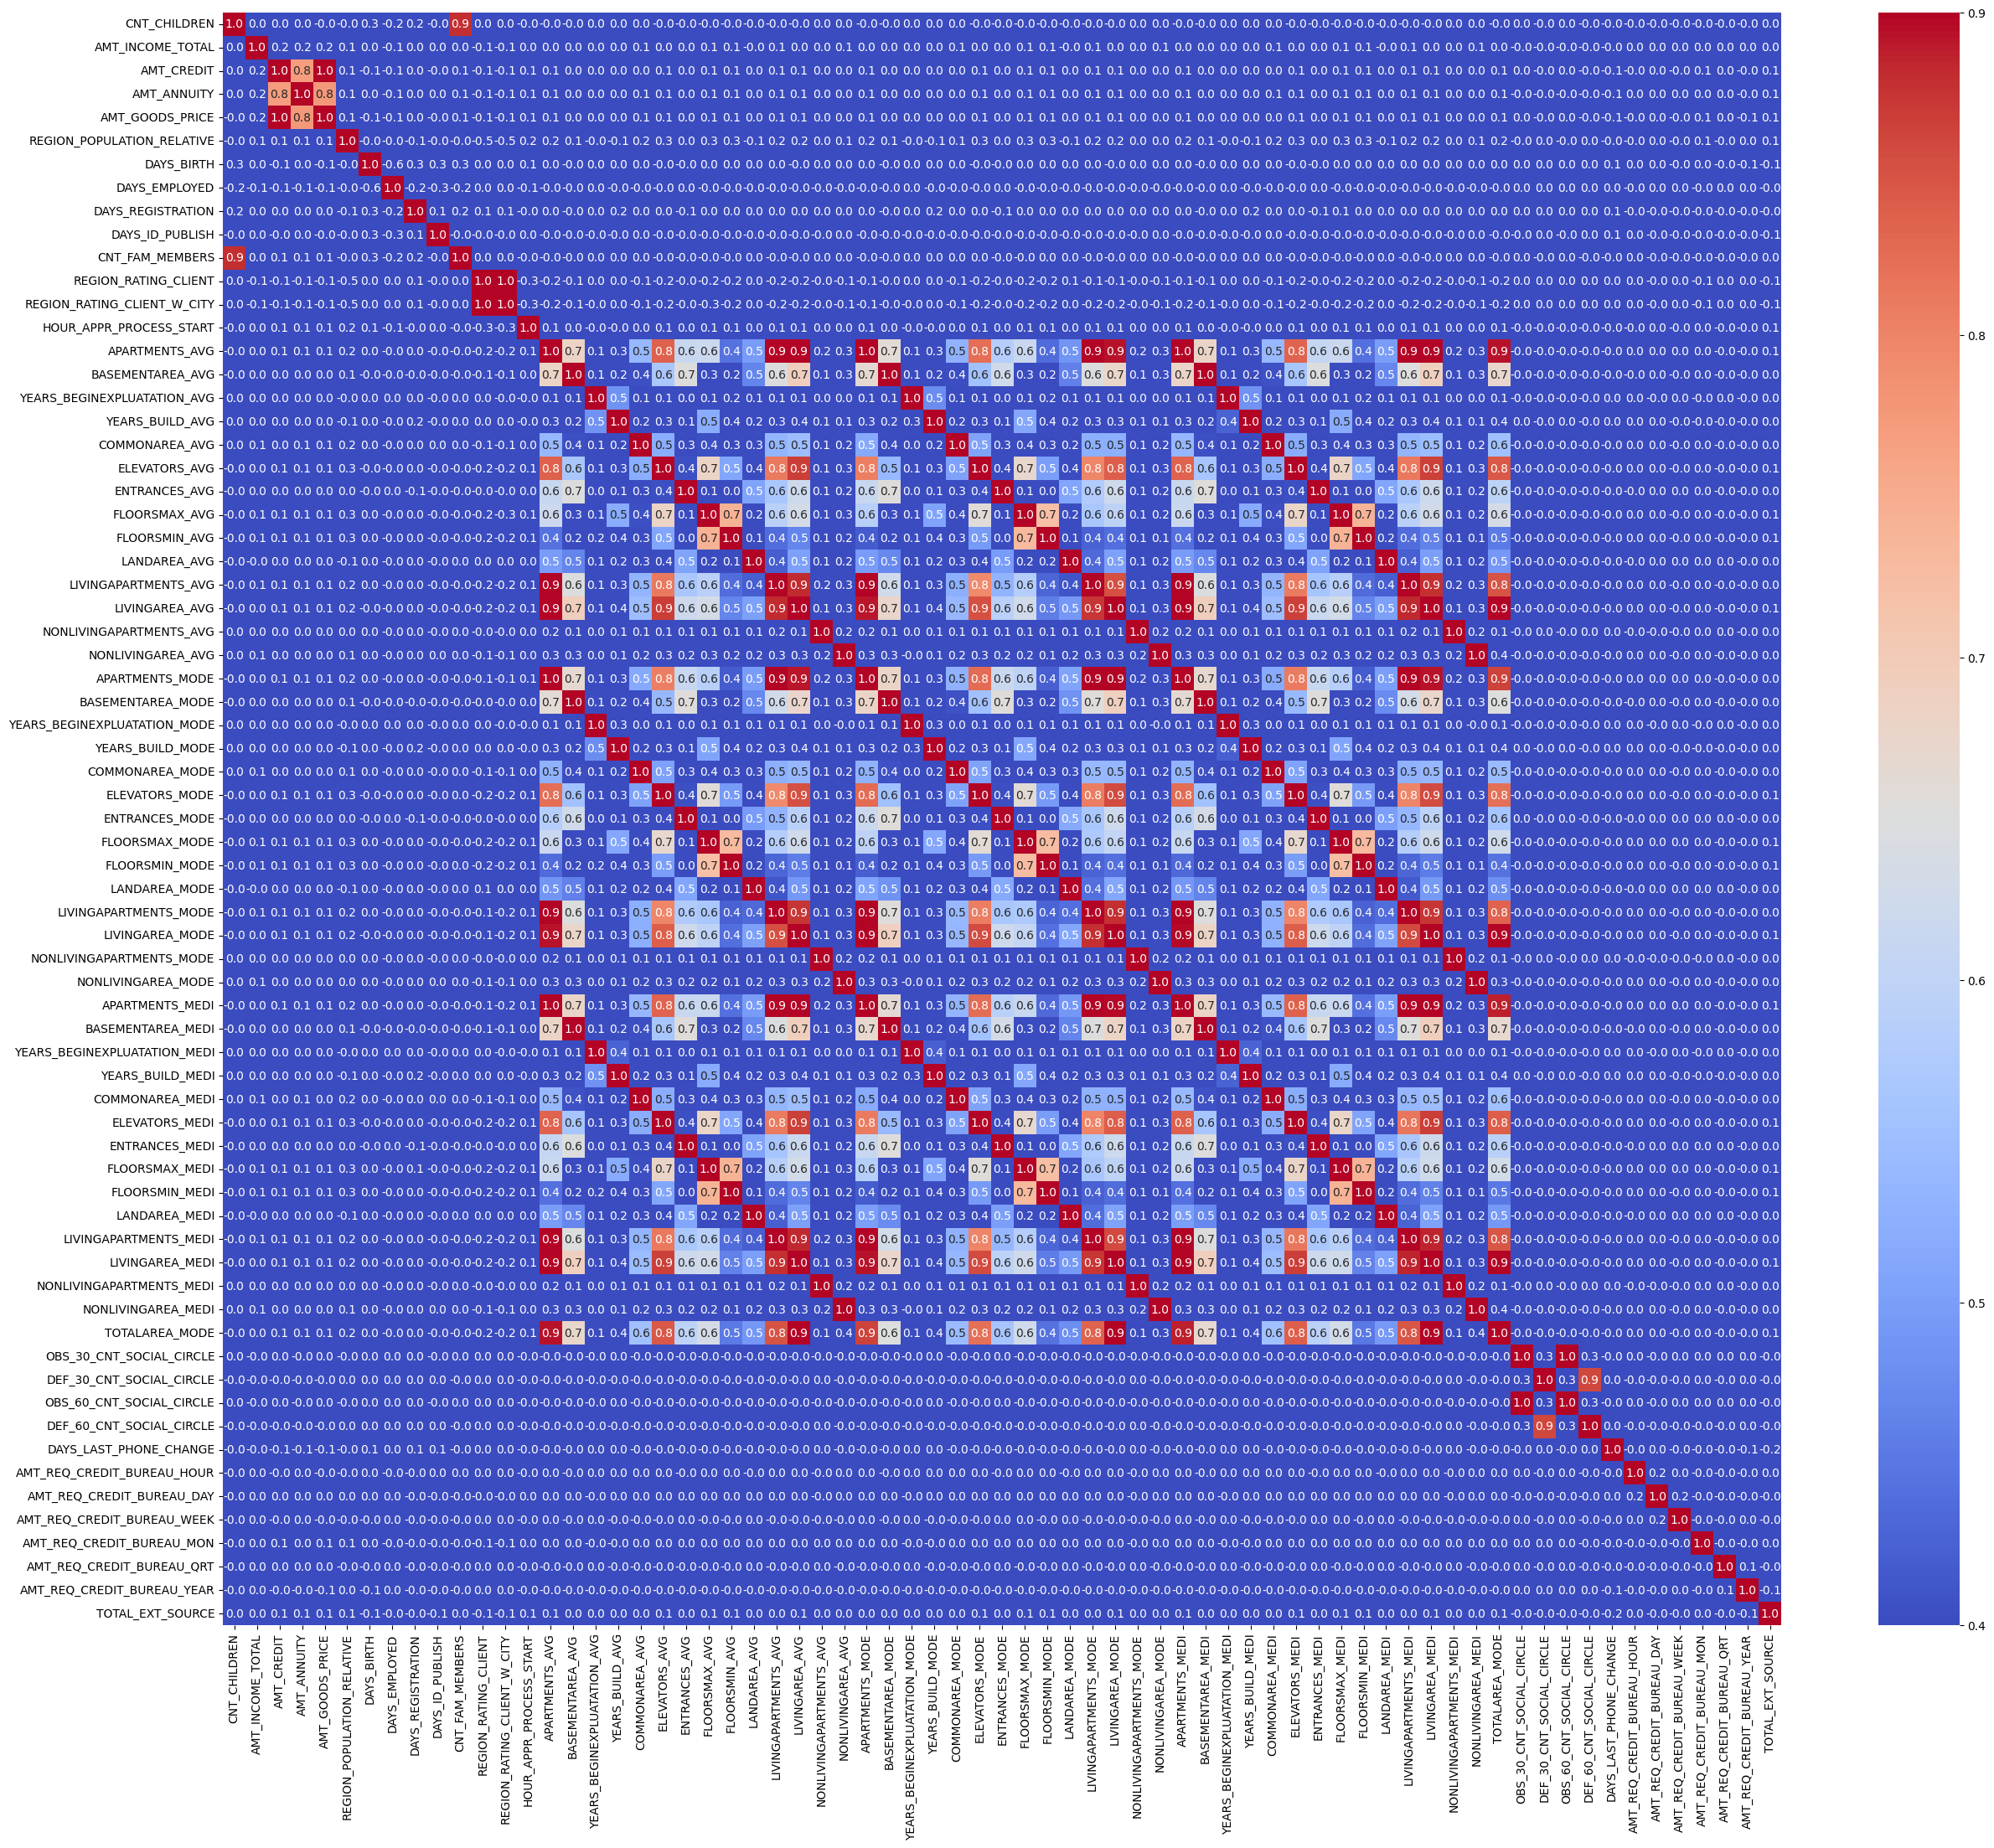

In [ ]:
# @title Analisa Korelasi Data Numerikal
plt.figure(figsize=(30,25))
numerik = train[numerikal]
sns.heatmap (numerik.corr(),vmin=0.4, vmax=0.9, annot= True, cmap='coolwarm', fmt='.1f')
